# Naive Baseline Model
Probably the most naive approach for prediction of a time series is predicting a constant change of 0 compared to the previous observation. This is the baseline for any model we build. If we manage to beat this prediction, the model is actually valuable. Otherwise, it is not worth using.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import preprocessing.numerical_data as pnd
%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join("data", "raw", "input.csv"), sep=";", index_col=0, parse_dates=[0], dtype=np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 994 entries, 2018-11-07 to 2015-01-02
Data columns (total 25 columns):
Open                       988 non-null float64
High                       988 non-null float64
Low                        988 non-null float64
Settle                     994 non-null float64
Change                     984 non-null float64
Volume                     988 non-null float64
Prev. Day Open Interest    993 non-null float64
Gas.Open                   990 non-null float64
Gas.High                   990 non-null float64
Gas.Low                    990 non-null float64
Gas.Settle                 994 non-null float64
Gas.Change                 984 non-null float64
Gas.Volume                 984 non-null float64
Coal.Open                  994 non-null float64
Coal.High                  994 non-null float64
Coal.Low                   994 non-null float64
Coal.Settle                994 non-null float64
Coal.Change                994 non-null float64
Coal.Volume 

In [3]:
df = pnd.chain_preparations(df)
loggable_columns = [col for col in df.columns if any(word in col for word in ("Open", "High", "Low", "Settle"))
                   and not "Interest" in col]
df[loggable_columns] = (df[loggable_columns] + 1).apply(np.log)

The naive model will always predict the settle value of the previous day as the settle value of each day. We can easily mock these predictions with the DataFrame containing our preprocessed data.

In [10]:
errors = (np.exp(df["Settle"]) - np.exp(df["Prev. Day Settle"])).values

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Error Mean: 0.012343268242548815
Error Standard Deviation: 0.30479713510517104
MSE: 0.3048904239335371


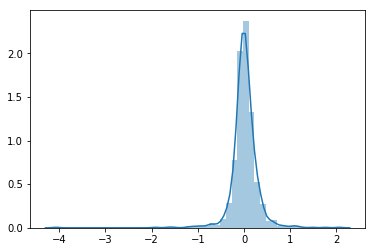

In [14]:
sns.distplot(errors)
print("Error Mean:", errors.mean())
print("Error Standard Deviation:", errors.std(ddof=1))
print("MSE:", np.sqrt(np.square(errors).mean()))

We can see that the naive model is off by 30 cents, on average. A machine learning model should learn associations that cannot be captured by this naive approach. Consequently, we aim to obtain a model that has a MSE of less than .3.